# 11. Working with Distributions: 
#### **Introduction**
This project investigates statistical distributions in a synthetic dataset representing store transactions over 100 days. Metrics analyzed include transactions, sales, profit, and customer count. The goals are:

1. **Normal Distribution**: Assess whether the sales data follows a normal distribution.
2. **Exponential Distribution**: Simulate an exponential distribution based on profit data to model time until an event occurs.
3. **Poisson Distribution**: Analyze the number of transactions, modeled as a Poisson distribution.

By examining these distributions, we aim to uncover underlying patterns and characteristics of the dataset.

---

In [2]:
import pandas as pd
import numpy as np
# Create a simple dataset with date, transactions, sales, profit, and customer count
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),  # Dates over 100 days
    'transactions': np.random.randint(500, 5000, size=100),  # Random number of transactions
    'sales': np.random.uniform(10000, 50000, size=100),  # Random sales amounts
    'profit': np.random.uniform(5000, 20000, size=100),  # Random profit amounts
    'customer_count': np.random.randint(100, 1000, size=100)  # Random customer count
}

# Create the DataFrame
df = pd.DataFrame(data)

# Save the data to a CSV file (optional)
df.to_csv('store_data_with_additional_columns.csv', index=False)

# Show the first few rows of the data
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

        date  transactions         sales        profit  customer_count
0 2023-01-01          3369  11306.276805   6327.011133             299
1 2023-01-02          4923  10984.099695  11935.018383             789
2 2023-01-03           545  28407.581216   7587.362414             912
3 2023-01-04          1657  27969.257929  13300.364375             814
4 2023-01-05          3248  29676.228612  11696.122303             722
         date  transactions         sales        profit  customer_count
95 2023-04-06          1397  46696.014595   7132.694254             193
96 2023-04-07          4577  31701.443923  18761.861522             654
97 2023-04-08          2218  22054.879119   9943.106530             955
98 2023-04-09           940  11870.306120  19945.188816             577
99 2023-04-10          4606  13896.618836   8009.019059             478
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dt

# Working with Distributions: Analyzing Store Data

## Introduction

In this project, we explore various statistical distributions using a synthetic dataset representing store transactions over 100 days. The dataset includes metrics such as transactions, sales, profit, and customer count. 

We will investigate:

- **Normal Distribution**: Assessing whether the sales data follows a normal distribution.
- **Exponential Distribution**: Simulating an exponential distribution based on profit data to model time until an event occurs.
- **Poisson Distribution**: Analyzing the number of transactions, which can be modeled as a Poisson distribution, often used for counting events in fixed intervals.

By visualizing and testing these distributions, we aim to better understand the underlying patterns in our store data.

### Normal Distribution Analysis

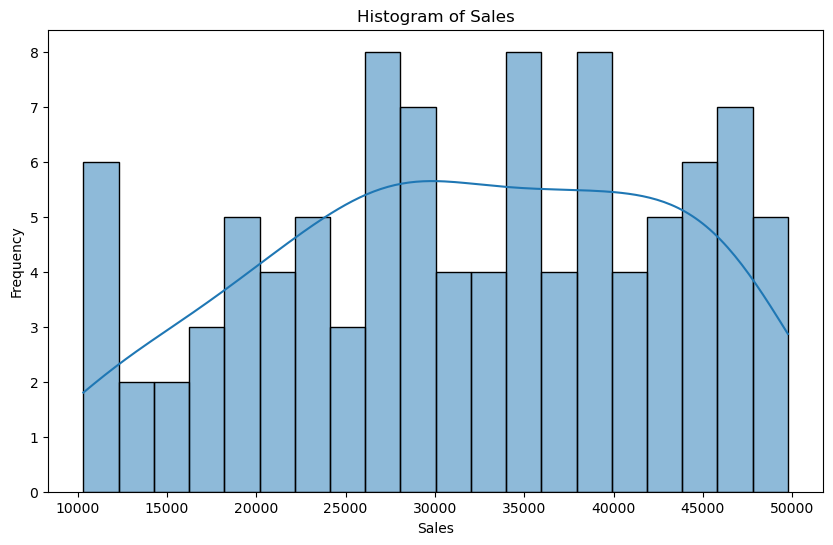

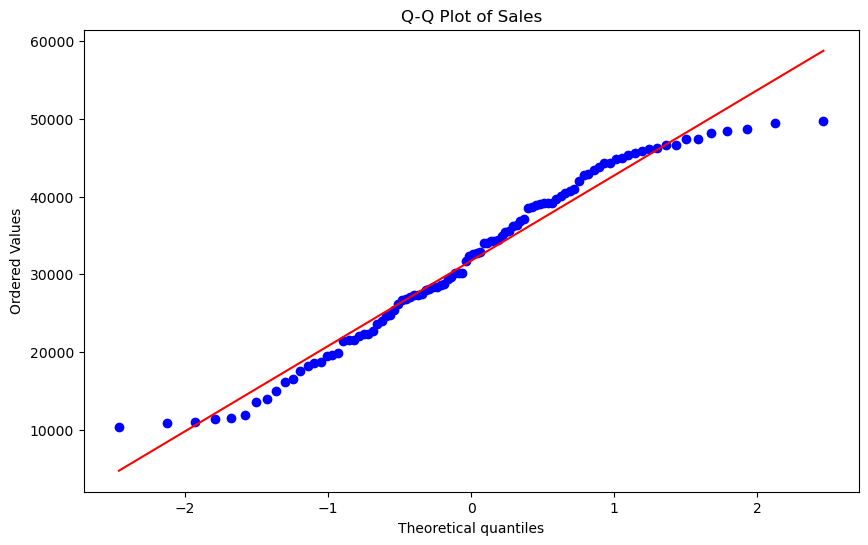

Shapiro-Wilk Test: Statistic=0.9631266745694034, p-value=0.006760739487284383


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=20, kde=True)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality
plt.figure(figsize=(10, 6))
stats.probplot(df['sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales')
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(df['sales'])
print(f'Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p}')

### Exponential Distribution Analysis

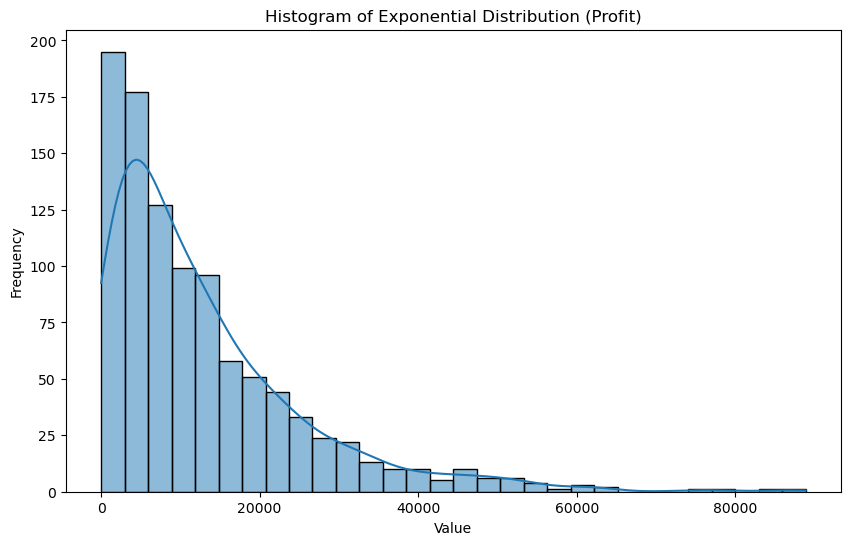

In [4]:
# Exponential distribution (using the mean profit as the scale)
mean_profit = df['profit'].mean()
exponential_data = np.random.exponential(scale=mean_profit, size=1000)

# Histogram of the exponential distribution
plt.figure(figsize=(10, 6))
sns.histplot(exponential_data, bins=30, kde=True)
plt.title('Histogram of Exponential Distribution (Profit)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Poisson Distribution Analysis

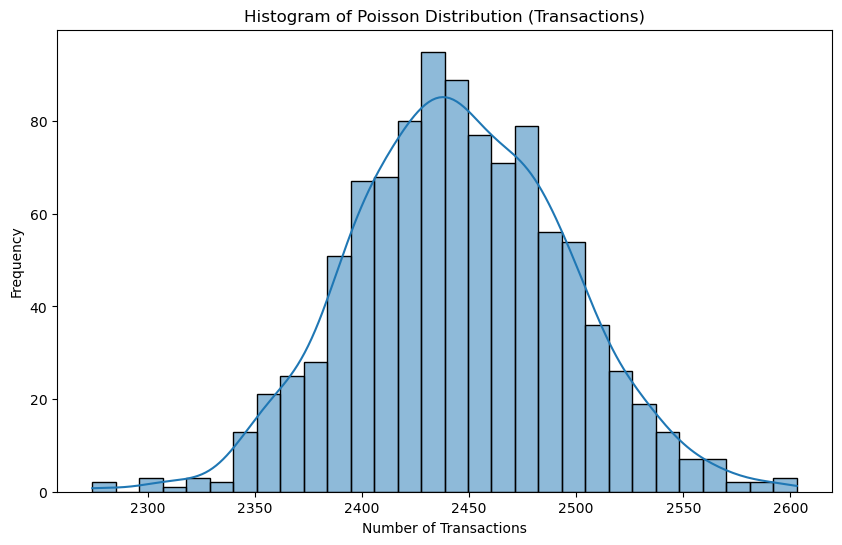

In [5]:
# Poisson distribution (using the mean number of transactions)
mean_transactions = df['transactions'].mean()
poisson_data = np.random.poisson(lam=mean_transactions, size=1000)

# Histogram of the Poisson distribution
plt.figure(figsize=(10, 6))
sns.histplot(poisson_data, bins=30, kde=True)
plt.title('Histogram of Poisson Distribution (Transactions)')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

### **Findings**

#### **1. Normal Distribution Analysis**
- **Visualization**:
  - The histogram and Q-Q plot suggest some deviations from a perfect normal distribution.
- **Shapiro-Wilk Test**:
  - **Statistic**: `0.963`
  - **p-value**: `0.0068`
  - **Interpretation**: The p-value is less than `0.05`, so we reject the null hypothesis. The sales data does not follow a normal distribution.

#### **2. Exponential Distribution Analysis**
- **Simulation**:
  - An exponential distribution was simulated using the mean profit (`scale = mean_profit`).
- **Visualization**:
  - The histogram shows the expected exponential decay pattern, consistent with the distribution's characteristics.

#### **3. Poisson Distribution Analysis**
- **Simulation**:
  - A Poisson distribution was simulated using the mean number of transactions (`λ = mean_transactions`).
- **Visualization**:
  - The histogram displays the expected discrete distribution pattern, matching the characteristics of Poisson distributions.

---

### **Summary**
1. **Normal Distribution**:
   - Sales data deviates from normality, as confirmed by statistical testing and visualizations.
2. **Exponential Distribution**:
   - Profit data simulated as an exponential distribution aligns well with the expected pattern.
3. **Poisson Distribution**:
   - Transaction counts modeled as a Poisson distribution demonstrate consistency with theoretical expectations.

This analysis highlights the diverse distributional properties of the dataset, providing a foundation for further statistical modeling and inference.